In [83]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_rows",999)

import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload

import amr_pcr
reload(amr_pcr)

<module 'amr_pcr' from '/home/fin/Documents/postdoc/AMR_PCR/amr_pcr.py'>

## Generate and Parse Data

In [85]:
# read primer data
primers = amr_pcr.read_primers('data/primers/tabula-333_primerliste-til-web-07-11-2013-9.tsv')

# parse CARD
card = amr_pcr.CARD('data/CARD/card.json')

# generate the vaware run script
#amr_pcr.build_vaware_script(primers, 'primer_assessment', 3)

# run the generated scripts
#!bash run_vaware.sh

# parse all data
df = amr_pcr.parse_all_data(card, primers)

CARD version 2.0.2
BIC dropped


## Overall Summary Stats

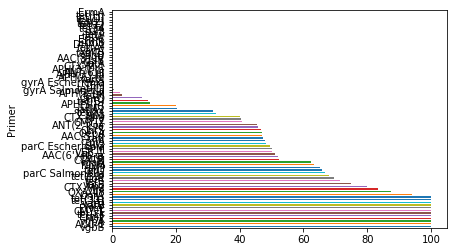

In [88]:
perfect_matches = df[df['Reason'] == 'Perfect'].groupby('Primer')['Reason'].count()
total_per_primer = df.groupby('Primer').size()
perc_perfect = perfect_matches / total_per_primer * 100
# if na then no matches where found with perfect match
perc_perfect = perc_perfect.fillna(0)
perc_perfect.sort_values(ascending=False).plot(kind='barh')

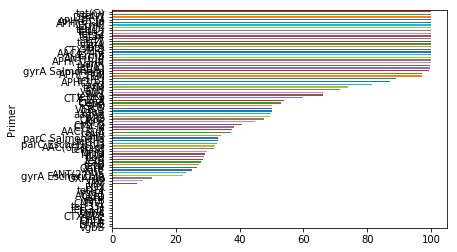

In [90]:
missed = df[df['PCR_quality'] == 'Missed'].groupby('Primer')['PCR_quality'].count()
perc_missed = missed / total_per_primer * 100
perc_missed = perc_missed.fillna(0)
perc_missed.sort_values().plot(kind='barh')

In [93]:
df.groupby('Primer')['PCR_quality'].value_counts() / df.groupby('Primer').size() * 100


Primer            PCR_quality 
AAC(3)-II         Perfect          47.058824
                  Missed           37.647059
                  Low              15.294118
AAC(3)-IV         Missed          100.000000
AAC(6')-Ib-cr     Perfect          50.967742
                  Missed           32.258065
                  Low              16.774194
ACC-1             Perfect         100.000000
ANT(2'')-Ia       Perfect          45.333333
                  Intermediate     28.666667
                  Missed           23.333333
                  Low               2.666667
ANT(6)-I          Missed          100.000000
APH(3'')-Ib       Missed          100.000000
APH(3')-I         Missed           87.303371
                  Perfect          11.910112
                  Low               0.674157
                  Intermediate      0.112360
APH(3')-II        Missed           97.127469
                  Perfect           2.333932
                  Low               0.359066
                  Interm

In [95]:
80 / (64+80+26) 

0.47058823529411764

In [127]:
def tally_name(df, name):
    sub_df = df[df['Primer'] == name].groupby('Name')['PCR_quality'].value_counts()
    sub_df = sub_df.reset_index(level=0).rename(columns={'PCR_quality': "Count"}).reset_index()
    #sns.barplot(data=sub_df, stacked=True, y='Name', x='Count', hue='PCR_quality', hue_order=['Perfect', 'Intermediate', 'Low', 'Missed'])
    return sub_df

ndm = tally_name(df, 'NDM')

/home/fin/miniconda3/envs/AMRtime_analysis/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Name    PCR_quality
NDM-1   Missed         AxesSubplot(0.125,0.125;0.775x0.755)
        Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-10  Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-12  Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-13  Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-14  Missed         AxesSubplot(0.125,0.125;0.775x0.755)
        Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-17  Missed         AxesSubplot(0.125,0.125;0.775x0.755)
        Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-2   Low            AxesSubplot(0.125,0.125;0.775x0.755)
        Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-3   Low            AxesSubplot(0.125,0.125;0.775x0.755)
        Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-4   Perfect        AxesSubplot(0.125,0.125;0.775x0.755)
NDM-5   Low            AxesSubplot(0.125,0.125;0.775x0.755)
        Missed         AxesSubplot(0.125,0.125;0.775x0.755)
        Perfect     

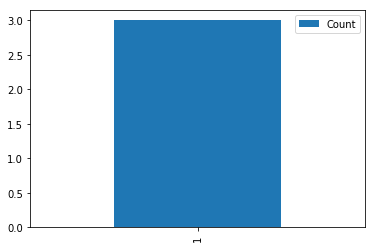

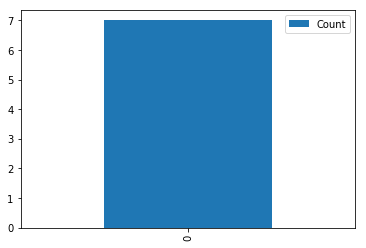

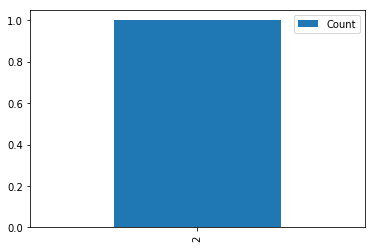

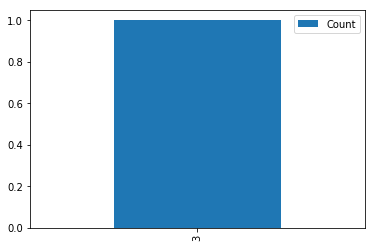

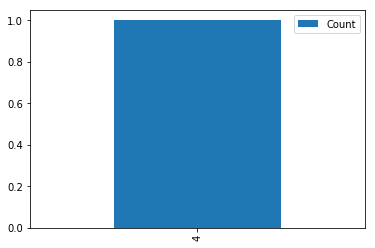

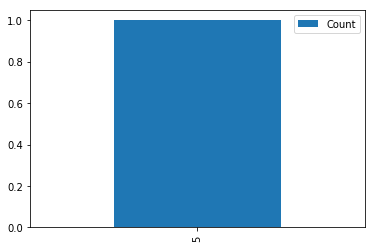

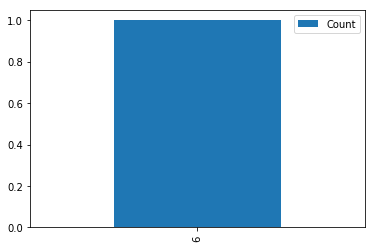

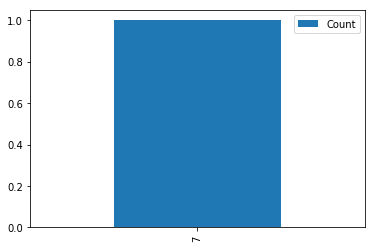

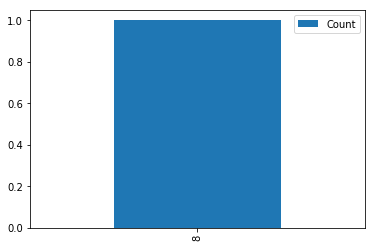

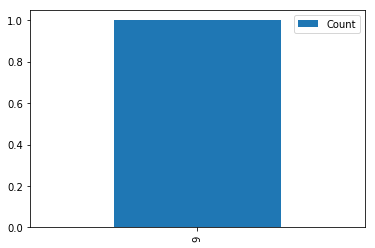

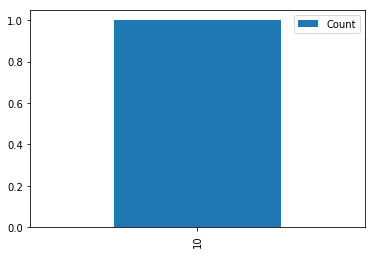

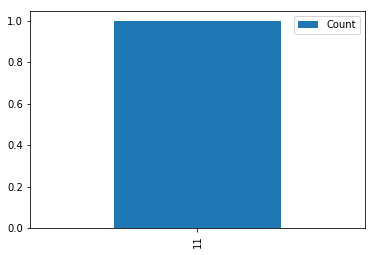

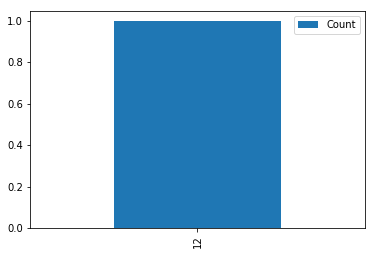

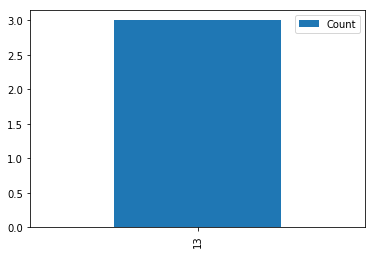

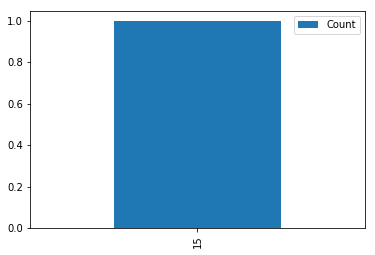

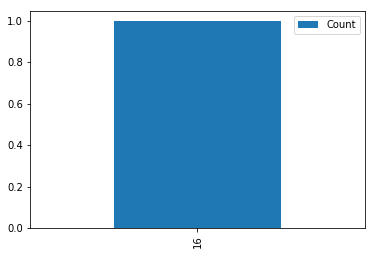

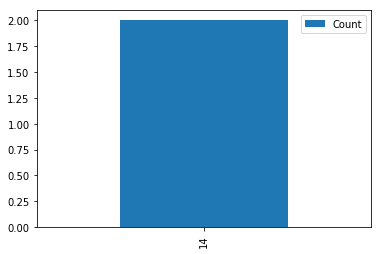

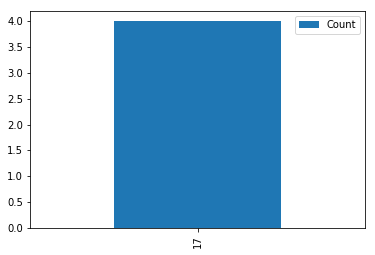

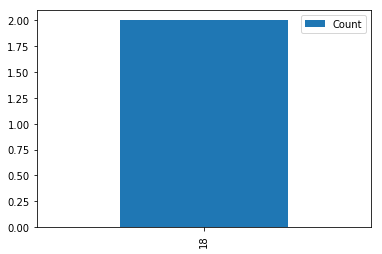

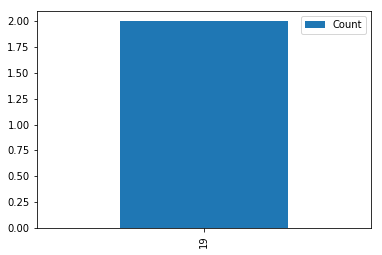

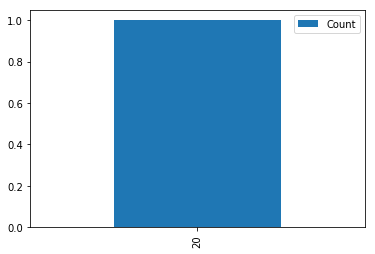

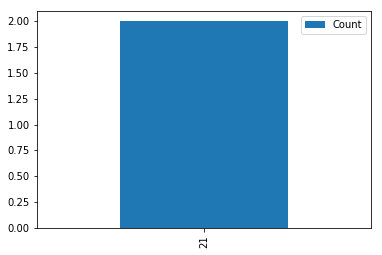

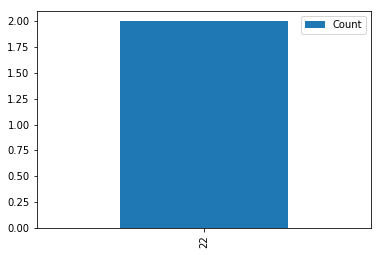

In [136]:
ndm

,PCR_quality,Name,Count
0,Perfect,NDM-1,7
1,Missed,NDM-1,3
2,Perfect,NDM-10,1
3,Perfect,NDM-12,1
4,Perfect,NDM-13,1
5,Missed,NDM-14,1
6,Perfect,NDM-14,1
7,Missed,NDM-17,1
8,Perfect,NDM-17,1
9,Low,NDM-2,1


## Parse Beta-lactam Tables

- Go over all the beta-lactam families and see coverage (proportion of members totally missing)
- Go over single hits and see those which don't have all perfect

In [480]:
tem = amr_pcr.summarise_name(card, 'TEM')

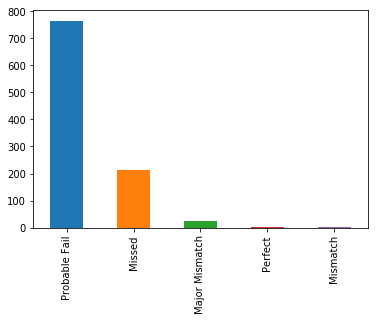

In [481]:
tem['PCR_quality'].value_counts().plot(kind='bar')

In [482]:
amr_pcr.summarise_name(card, 'ACC-1')

,FP Matches,FP Mismatches,FP Gaps,FP 3' Mismatches,FP Align Begin,FP Align End,RP Matches,RP Mismatches,RP Gaps,RP 3' Mismatches,...,ID,Name,Type,ARO,major_mismatches,total_mismatches,minor_mismatches,PCR_quality,Reason,Primer Set
1568,19.0,0.0,0.0,0.0,214.0,233.0,20.0,0.0,0.0,0.0,...,gb|AJ133121|+|649-1810|ARO:3001815|ACC-1 [Kleb...,ACC-1,Canonical,3001815,0.0,0.0,0.0,Perfect,Perfect,ACC-1
20944,19.0,0.0,0.0,0.0,226.0,245.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:23261|ARO_Name:ACC-1|AR...,ACC-1,Prevalence,3001815,0.0,0.0,0.0,Perfect,Perfect,ACC-1


In [483]:
oxa48 = amr_pcr.summarise_name(card, 'OXA-48')

In [484]:
oxa48.loc[oxa48['PCR_quality'] == 'Missed', 'ID'].values

array([ 'Prevalence_Sequence_ID:27227|ARO_Name:OXA-48|ARO:3001782|Detection_Model:Protein Homolog Model'], dtype=object)

In [476]:
oxa48

,FP Matches,FP Mismatches,FP Gaps,FP 3' Mismatches,FP Align Begin,FP Align End,RP Matches,RP Mismatches,RP Gaps,RP 3' Mismatches,...,ID,Name,Type,ARO,major_mismatches,total_mismatches,minor_mismatches,PCR_quality,Reason,Primer Set
1029,20.0,0.0,0.0,0.0,250.0,270.0,20.0,0.0,0.0,0.0,...,gb|AY236073|+|2187-2985|ARO:3001782|OXA-48 [Kl...,OXA-48,Canonical,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
5504,20.0,0.0,0.0,0.0,250.0,270.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:4783|ARO_Name:OXA-48|AR...,OXA-48,Prevalence,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
19328,20.0,0.0,0.0,0.0,118.0,138.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:21462|ARO_Name:OXA-48|A...,OXA-48,Prevalence,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
23492,20.0,0.0,0.0,0.0,295.0,315.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:26093|ARO_Name:OXA-48|A...,OXA-48,Prevalence,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
24536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Prevalence_Sequence_ID:27227|ARO_Name:OXA-48|A...,OXA-48,Prevalence,3001782,NaN,NaN,NaN,Missed,No Match,OXA-48
24900,20.0,0.0,0.0,0.0,250.0,270.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:27626|ARO_Name:OXA-48|A...,OXA-48,Prevalence,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
24905,20.0,0.0,0.0,0.0,250.0,270.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:27632|ARO_Name:OXA-48|A...,OXA-48,Prevalence,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
28108,20.0,0.0,0.0,0.0,274.0,294.0,20.0,0.0,0.0,0.0,...,Prevalence_Sequence_ID:31283|ARO_Name:OXA-48|A...,OXA-48,Prevalence,3001782,0.0,0.0,0.0,Perfect,Perfect,OXA-48
